In [1]:
# lets import the important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
# lets import the dataset.

data = pd.read_csv('C:/Users/GS/OneDrive/Desktop/Python/Project ( Linear and Logistic Regression)/Linear+Regression+and+Logistic+Regression+in+Python/Classification/dataset/card_transdata.csv')
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [3]:
# check the data types
data1 = data[0:100001]

In [4]:
data1

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
99996,16.908113,9.274847,0.251770,1.0,1.0,0.0,1.0,0.0
99997,6.195276,2.373588,9.652850,1.0,0.0,0.0,1.0,1.0
99998,43.637384,10.873590,4.108374,1.0,0.0,0.0,1.0,1.0
99999,9.310937,0.034799,0.489110,1.0,0.0,0.0,1.0,0.0


In [5]:
# lets check the missing values
data1.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [6]:
# lets check the categorical column's values

data1['fraud'].unique()


array([0., 1.])

In [7]:
# So this data is about fraudulent credit cards in 2013 at Europe

# 1 define that fraud activity occurred.
# 0 define no such activity occurred.




In [46]:
Fraud = data1['fraud'][data1['fraud']==1].count()
Fraud

8710

In [47]:
Non_Fraud = data1['fraud'][data1['fraud']==0].count()
Non_Fraud

91291

In [48]:
total = Fraud + Non_Fraud

In [49]:
total

100001

In [53]:
print(f"Total Non Fraud proportion is {Non_Fraud*100/(total)} %",
     f" and Total Non Fraud proportion is {Fraud*100/(total)} %")

Total Non Fraud proportion is 91.29008709912901 %  and Total Non Fraud proportion is 8.709912900870991 %


([<matplotlib.axis.XTick at 0x20d9a2918d0>,
 [Text(0, 0, 'nonfraud'), Text(1, 0, 'fraud')])

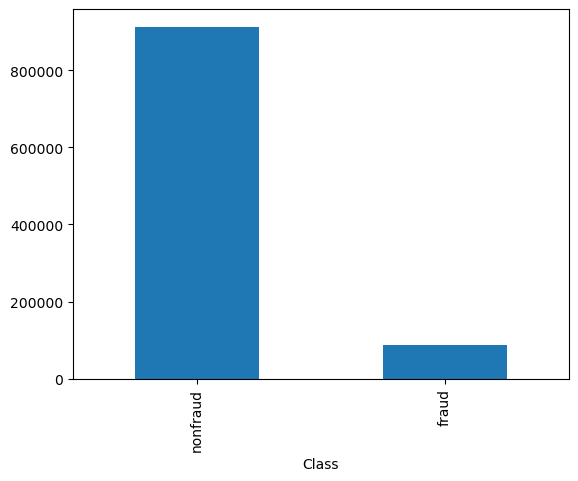

In [58]:
# lets ploton  

label = ['nonfraud','fraud']
classes = pd.value_counts(data['fraud'],sort = True)
classes.plot(kind = 'bar')
plt.xlabel('Class')
plt.xticks(range(2),label)

In [67]:
# lets explore the descriptive statisitcs

data1.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000
mean,26.688463,5.023680,1.819374,0.882091,0.351066,0.103249,0.650663,0.087099
std,65.131753,24.439300,2.912835,0.322502,0.477306,0.304285,0.476763,0.281982
min,0.021322,0.000488,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.864929,0.295818,0.476396,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.965336,0.996720,0.996102,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.724613,3.333011,2.088998,1.000000,1.000000,0.000000,1.000000,0.000000
max,4601.011222,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
data1['repeat_retailer'].value_counts()

repeat_retailer
1.0    88210
0.0    11791
Name: count, dtype: int64

In [69]:
data1['used_chip'].value_counts()

used_chip
0.0    64894
1.0    35107
Name: count, dtype: int64

In [70]:
data1['used_pin_number'].value_counts()

used_pin_number
0.0    89676
1.0    10325
Name: count, dtype: int64

In [71]:
data1['online_order'].value_counts()

online_order
1.0    65067
0.0    34934
Name: count, dtype: int64

In [72]:
data1['fraud'].value_counts()

fraud
0.0    91291
1.0     8710
Name: count, dtype: int64

<Axes: xlabel='distance_from_home', ylabel='Count'>

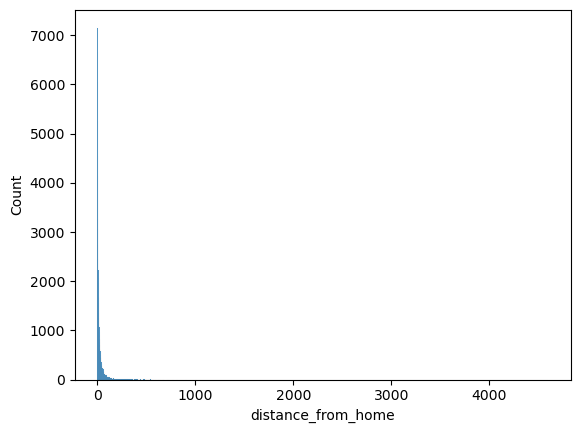

In [74]:

sns.histplot(x = data1['distance_from_home'])


In [89]:
up= np.percentile(data1['distance_from_home'],[99])[0]
up

263.5532845659583

In [90]:
data1[data['distance_from_home']>up]

C:\Users\GS\AppData\Local\Temp\ipykernel_2304\1603438353.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1[data['distance_from_home']>up]


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
12,765.282559,0.371562,0.551245,1.0,1.0,0.0,0.0,0.0
112,335.189320,1.114168,0.098243,1.0,0.0,0.0,1.0,1.0
261,601.522919,0.028723,0.859779,1.0,0.0,0.0,1.0,1.0
393,386.095254,5.367957,1.615735,1.0,0.0,0.0,1.0,1.0
412,965.910612,0.023604,0.257908,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
99471,404.128288,7.248917,0.269265,1.0,0.0,0.0,0.0,0.0
99578,317.156105,0.138331,2.270468,1.0,1.0,0.0,1.0,0.0
99637,301.400004,0.046748,4.904312,1.0,0.0,0.0,0.0,1.0
99849,433.658641,0.479514,1.721071,1.0,0.0,0.0,1.0,1.0


### The distance is not a variable that shows the outliers easily, particularly in fraudulent activity like it is possible that the fraud happened at a highly distant place.

In [59]:
import warnings
warnings.filterwarnings('ignore')


In [60]:
# lets do the standard scaling
from sklearn.preprocessing import StandardScaler
d = StandardScaler()
data1['distance_from_home']= d.fit_transform(data1[['distance_from_home']])

In [61]:
data1['distance_from_last_transaction']= d.fit_transform(data1[['distance_from_last_transaction']])
data1['ratio_to_median_purchase_price']= d.fit_transform(data1[['ratio_to_median_purchase_price']])

In [97]:
data1

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.478869,-0.192827,0.043451,1.0,1.0,0.0,0.0,0.0
1,-0.243485,-0.198374,-0.180291,1.0,0.0,0.0,0.0,0.0
2,-0.331597,-0.172613,-0.477770,1.0,0.0,0.0,1.0,0.0
3,-0.375255,0.023584,-0.500103,1.0,1.0,0.0,1.0,0.0
4,0.268725,-0.182379,0.138489,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
99996,-0.150163,0.173949,-0.538174,1.0,1.0,0.0,1.0,0.0
99997,-0.314644,-0.108436,2.689310,1.0,0.0,0.0,1.0,1.0
99998,0.260226,0.239366,0.785836,1.0,0.0,0.0,1.0,1.0
99999,-0.266807,-0.204135,-0.456693,1.0,0.0,0.0,1.0,0.0


In [98]:
data1.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1.000010e+05,1.000010e+05,1.000010e+05,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000
mean,5.250858e-17,-1.758576e-17,-9.908419e-17,0.882091,0.351066,0.103249,0.650663,0.087099
std,1.000005e+00,1.000005e+00,1.000005e+00,0.322502,0.477306,0.304285,0.476763,0.281982
min,-4.094359e-01,-2.055385e-01,-6.207046e-01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.504228e-01,-1.934542e-01,-4.610575e-01,1.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.567597e-01,-1.647748e-01,-2.826374e-01,1.000000,0.000000,0.000000,1.000000,0.000000
75%,-1.479854e-02,-6.917863e-02,9.256471e-02,1.000000,1.000000,0.000000,1.000000,0.000000
max,7.023219e+01,8.819758e+01,9.093261e+01,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
corr = data1.corr()
corr

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.002562,-0.000656,0.143589,-0.002928,0.002518,-0.000250,0.187143
distance_from_last_transaction,-0.002562,1.000000,0.000531,-0.006873,0.000282,0.001851,-0.001004,0.097031
ratio_to_median_purchase_price,-0.000656,0.000531,1.000000,-0.001365,-0.000684,0.001522,0.002817,0.441085
repeat_retailer,0.143589,-0.006873,-0.001365,1.000000,-0.002636,-0.002302,0.003510,-0.002201
used_chip,-0.002928,0.000282,-0.000684,-0.002636,1.000000,-0.000052,-0.001619,-0.062395
used_pin_number,0.002518,0.001851,0.001522,-0.002302,-0.000052,1.000000,0.000613,-0.101430
online_order,-0.000250,-0.001004,0.002817,0.003510,-0.001619,0.000613,1.000000,0.192707
fraud,0.187143,0.097031,0.441085,-0.002201,-0.062395,-0.101430,0.192707,1.000000


<Axes: >

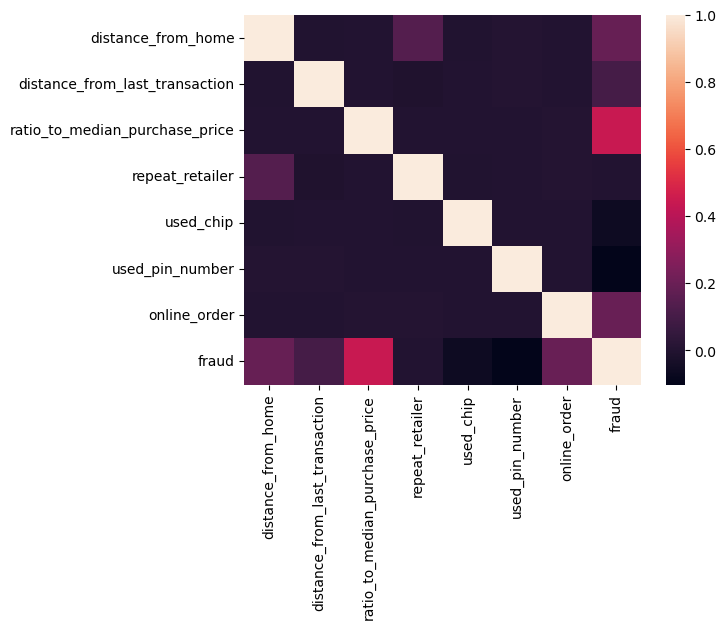

In [64]:
sns.heatmap(corr)

In [65]:
# the best correlation happened between (ratio to median purchase price)(feature) and fraud(target variable).

In [66]:
# lets import the libraries and split the data

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(data1.iloc[:,0:8],data1['fraud'],test_size = 0.2,random_state = 42)

In [67]:
# lets import the model and its performace indicators

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=1)

In [68]:
y_pred = knn.predict(xtest)

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [70]:
accuracy_score(ytest,y_pred)

0.9996500174991251

In [71]:
precision_score(ytest,y_pred)

0.9982384028185555

In [72]:
cm =confusion_matrix(ytest,y_pred)
cm

array([[18294,     3],
       [    4,  1700]], dtype=int64)

<Axes: >

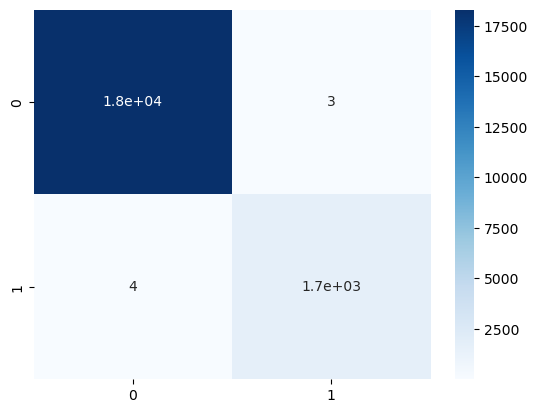

In [73]:
sns.heatmap(cm,annot=True,cmap='Blues')

### It tells that 18000 non_fruad values are true positive which are considered as fruad and 1700 values are true negative which are considered as fruad. 4 values are called false positives as these 4 values are wrongly placed in (the non-fraud) category whereas 3 are called false negatives as these points are wrongly placed in (the fraud) category.

In [74]:
# let check the error through accuracy value using different values of K.

# lets train the model.
kvalues = [i for i in range(1,11)]
def funct(numbers,x_training,y_training,x_testing,y_testing):
        accuracy = []
        for n in numbers:
            c1 = KNeighborsClassifier(n_neighbors = n)
            c1.fit(x_training,y_training)
            accuracy.append(accuracy_score(y_testing,c1.predict(x_testing),normalize=True))
        return accuracy

In [75]:
output = funct(kvalues,xtrain,ytrain,xtest,ytest)
output

[0.9996500174991251,
 0.999550022498875,
 0.999550022498875,
 0.999550022498875,
 0.9996500174991251,
 0.9996000199990001,
 0.999550022498875,
 0.999550022498875,
 0.9996000199990001,
 0.9996000199990001]

<Axes: >

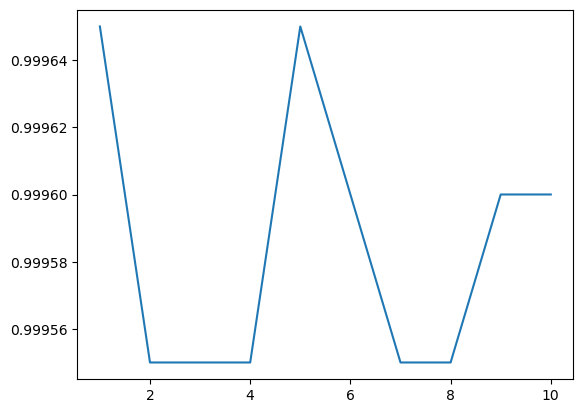

In [76]:
sns.lineplot(x = kvalues,y =output)

In [77]:
# lets predict any randon values on model to check the accuracy (row no 150007 are originally called fraud)
x_2 = data.iloc[150007]
x_2 

distance_from_home                 7.938698
distance_from_last_transaction     6.960747
ratio_to_median_purchase_price    10.283268
repeat_retailer                    1.000000
used_chip                          0.000000
used_pin_number                    0.000000
online_order                       1.000000
fraud                              1.000000
Name: 150007, dtype: float64

In [78]:
y2_pre = knn.predict([x_2])

In [79]:
y2_pre[0]  # 1 means fruad as it mentioned in original description in above output.

1.0

In [80]:
# So the model has correctly predicted the provided input.

### Overall, the model has well predicted the frauds, as it captured the true meaning of variables and gave us the prominent result.